In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('husl')

## Get results and tidy dataset

In [67]:
df = pd.read_csv('data/results.csv', usecols=['title', 'year', 'decision', 'approach', 'category', 'model', 'preprocessing', 'skill', 'evaluation'])
df = df[df.decision.str.contains('Include')]
df.head()

,year,title,decision,approach,category,model,preprocessing,skill,evaluation
9,2014,A system to grade computer programming skills ...,Include,Supervised,Traditional,Ridge Regression and others,"Convert to AST, CFG and DDG",Correctness,CV and Pearson Correlation between models
10,2014,Feature engineering for clustering student sol...,Include,Unsupervised,Traditional,k-Means,"Extract features, convert to AST",Correctness,"Compared to human, AMI"
11,2015,Learning Program Embeddings to Propagate Feedb...,Include,Supervised,Neural,Encoder/Decoder for embedding and RNN for pred...,Convert to AST,Correctness and readability,"Compare to baselines, unit tests, Bag of Trees..."
12,2016,Question independent grading using machine lea...,Include,Supervised,Traditional,LASSO,"Convert to Grammar, Build ‘good set’ using uni...",Correctness,"Human, other models"
13,2017,Automatic extraction of AST patterns for debug...,Include,Supervised,Traditional,"Random Forest, Majority Classifer","Convert to AST, Build good set using unit tests",Correctness,Accuracy and output quality


In [68]:
df.dtypes

year              int64
title            object
decision         object
approach         object
category         object
model            object
preprocessing    object
skill            object
evaluation       object
dtype: object

## Results
### Years Published

In [69]:
count_years = df.year.value_counts().reset_index().rename(columns={'index': 'year', 'year': 'no_published'})
count_years.head()

,year,no_published
0,2019,7
1,2018,3
2,2014,2
3,2017,2
4,2021,2


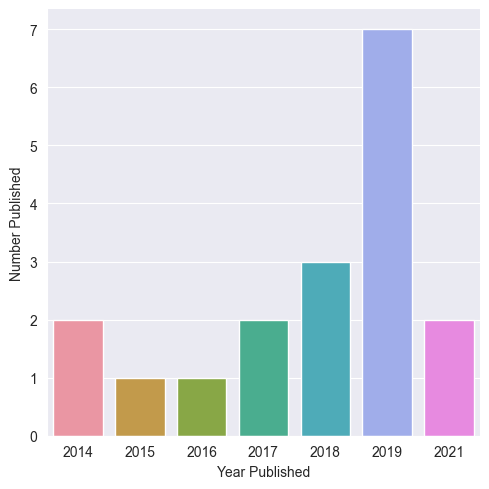

In [70]:
years_plt = sns.catplot(count_years, kind='bar', x='year', y='no_published')
years_plt.set(xlabel='Year Published', ylabel='Number Published')
plt.savefig('plots/years_published.pdf')

## Skills

In [84]:
skill = df.skill.value_counts().reset_index()
skill.columns = ["skill", 'no_papers']
skill.skill = skill.skill.str.title()
skill['proportion'] = (skill.no_papers / skill.no_papers.sum()) * 100
skill

,skill,no_papers,proportion
0,Correctness,10,55.555556
1,Syntactic Correctness,6,33.333333
2,Correctness And Readability,1,5.555556
3,Correctness And Maintainability,1,5.555556


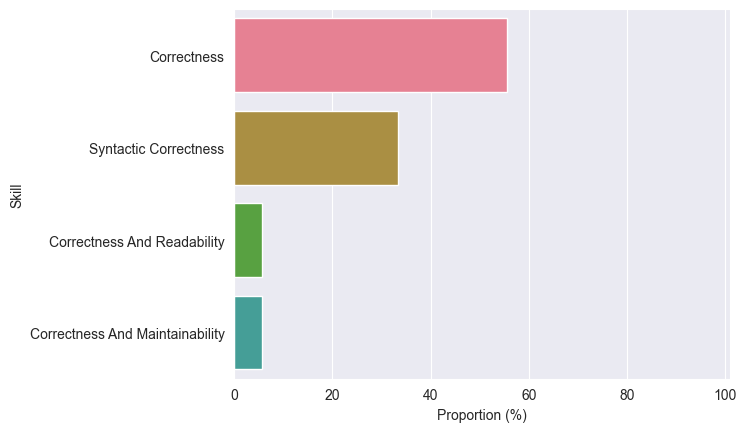

In [85]:
ax_skill = sns.barplot(skill, y='skill', x='proportion')
ax_skill.set(xlabel = 'Proportion (%)', ylabel='Skill')
plt.xlim([0, 101])
plt.savefig('plots/skill.pdf', bbox_inches='tight')

## Paradigm

In [80]:
paradigm = df.approach.value_counts().reset_index()
paradigm.columns = ["paradigm", 'no_papers']
paradigm['proportion'] = (paradigm.no_papers / paradigm.no_papers.sum()) * 100
paradigm

,paradigm,no_papers,proportion
0,Supervised,14,77.777778
1,Unsupervised,3,16.666667
2,Semi-Supervised,1,5.555556


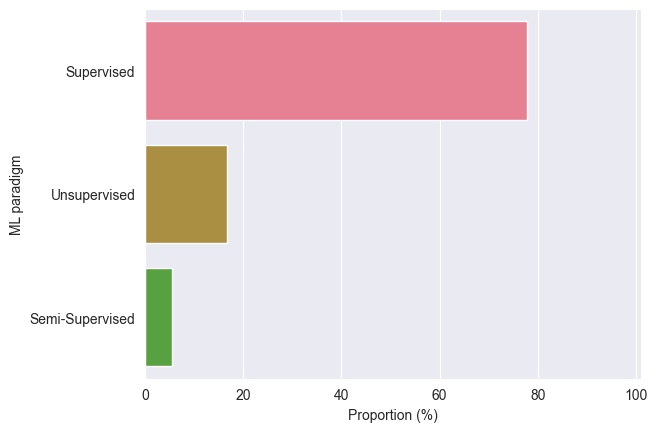

In [81]:
ax_paradigm = sns.barplot(paradigm, y='paradigm', x='proportion')
ax_paradigm.set(xlabel = 'Proportion (%)', ylabel='ML Paradigm')
plt.xlim([0, 101])
plt.savefig('plots/paradigm.pdf', bbox_inches='tight')

## Category

In [86]:
category = df.category.value_counts().reset_index()
category.columns = ["category", 'no_papers']
category['proportion'] = (category.no_papers / category.no_papers.sum()) * 100
category.category = category.category.str.replace('Neural', 'Deep Learning')
category

,category,no_papers,proportion
0,Deep Learning,10,55.555556
1,Traditional,6,33.333333
2,Both,1,5.555556
3,Deep Learning and Agent-Based,1,5.555556


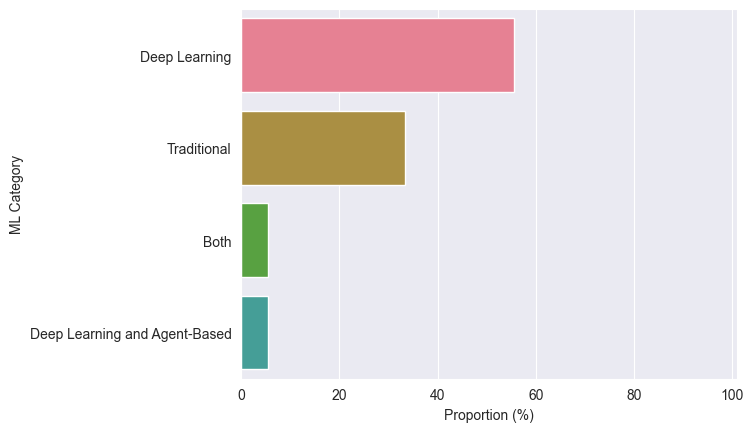

In [87]:
ax_category = sns.barplot(category, y='category', x='proportion')
ax_category.set(xlabel = 'Proportion (%)', ylabel='ML Category')
plt.xlim([0, 101])
plt.savefig('plots/category.pdf', bbox_inches='tight')

## Model
Covered by above two plots and will have specific detail in the discussion section.

## Preprocessing

In [77]:
df.preprocessing.value_counts()

Normalize names and literals                                             4
Convert to AST                                                           2
Convert to AST, CFG and DDG                                              1
Extract features, convert to AST                                         1
Convert to Grammar, Build ‘good set’ using unit testing                  1
Convert to AST, Build good set using unit tests                          1
Normalize rarely used tokens                                             1
Convert string to number, normalise between 0 and 1                      1
Convert to sequence of ASTs                                              1
Remove comments, normalise names, train skip-gram model for embedding    1
Convert to AST, normalise variable names                                 1
Name and literal normalisation, encode to 1-hot vector                   1
Convert blocks to string, create rubric with context-free-grammar        1
Comments removed, literal

## Evaluation

In [78]:
df.evaluation.value_counts()

Accuracy, compared to other baseline models                                   2
CV and Pearson Correlation between models                                     1
Compared to human                                                             1
Accuracy                                                                      1
Model comparison, compared to human                                           1
Accuracy, precision and recall. And case study                                1
Compared to other localisation tools                                          1
10-Fold CV                                                                    1
PR-AUC comparison of hyperparatemrs                                           1
MRR comparison between the two approaches                                     1
Compared to human, AMI                                                        1
Perc@k and SPerc@k                                                            1
Accuracy compared to raw dataset        